# **Question 1: Data Preprocessing**

Scenario: You are given a dataset data.csv containing customer data for a retail company. The
dataset includes features like 'Age', 'Annual Income', and 'Spending Score'. You need to
preprocess this data for clustering analysis.

# **Tasks:**

Load the data using Pandas and display the first five rows.

Handle any missing values in the dataset.

Normalize the 'Annual Income' and 'Spending Score' columns using Min-Max scaling.

# **Explanation:**

Explain the steps you took to preprocess the data and why.

# **Step 1: Load the data using Pandas and display the first five rows**

To start the preprocessing of the dataset data.csv for clustering analysis, you'll first need to load the data into a Python environment using Pandas, which is a powerful data manipulation library. The initial step involves reading the CSV file and displaying the first few entries to understand the structure and nature of the data.

Here's how you can do it:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/CustomerData.csv')

In [ ]:
data.head(5)

,Age,Annual Income,Spending Score
0,49,68966,52
1,31,30101,18
2,43,64627,94
3,49,47078,10
4,51,60455,30


# **Step 2: Handle any missing values in the dataset**

After inspecting the first few rows, the next step is to check for and handle missing values. Missing data can distort the analysis, especially in algorithms like clustering which rely on distance metrics. There are several strategies to deal with missing data:

* Remove rows with missing values.

* Fill missing values with a statistic (mean, median, mode, etc.).

* Impute missing values based on other methods (like k-nearest neighbors,
  regression, etc.).

Depending on the amount and importance of the missing data, and the nature of the analysis, you might choose one strategy over another. For simplicity, if there are not many missing entries, you might just remove those rows or fill them with the median or mean:


In [ ]:
data.isnull().sum()

Age               0
Annual Income     0
Spending Score    0
dtype: int64

# **Step 3: Normalize the 'Annual Income' and 'Spending Score' columns using Min-Max scaling**

Normalization is crucial before clustering because it brings all features to the same scale. Without this, a feature with a higher range of values will dominate the distance calculations, potentially skewing the results.

Min-Max scaling is a common type of normalization that adjusts the data to a fixed range, typically 0 to 1. The formula used is:


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Annual Income', 'Spending Score']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
print(data.head())


   Age  Annual Income  Spending Score
0   49       0.983725        0.542553
1   31       0.000000        0.180851
2   43       0.873899        0.989362
3   49       0.429710        0.095745
4   51       0.768300        0.308511


# **Question 1:**

**Scenario and Tasks**:

You have a dataset with customer features and need to preprocess it for clustering analysis. The tasks involve loading the data, handling missing values, and normalizing certain columns.

### **Steps Taken:**

**Load Data**: Using Pandas, the data is loaded to inspect and understand the structure, which helps in subsequent preprocessing steps.

**Handle Missing Values**: Missing data can mislead or bias the clustering algorithm. Options include removing missing data or imputing values based on median, mean, or mode.

**Normalize Data**: Min-Max scaling was applied to 'Annual Income' and 'Spending Score' to ensure these features contribute equally during clustering, preventing any feature with a larger scale from dominating the distance calculations used in clustering algorithms.

**Why These Steps**:

**Loading Data**: Essential first step for any data processing task.
Handling Missing Values: Ensures the quality and completeness of data used for modeling.

**Normalization**: Critical for distance-based algorithms like K-means used in clustering to ensure fair comparison and grouping based on normalized distances.

# **Question 1 : ENDING**

# **Question 2: Model Building and Evaluation**

Scenario: You want to predict whether a customer will subscribe to a new service based on their
features in the dataset customer_data.csv. The target variable is 'Subscribed' which is binary.

# **Tasks:**

Split the dataset into training and testing sets with a test size of 20%.

Train a logistic regression model on the training data.

Evaluate the model on the test data using accuracy and confusion matrix.

# **Explanation:**

Discuss the choice of logistic regression for this scenario.
Explain what the confusion matrix tells you about the model's performance.

# **Step 1: Split the dataset into training and testing sets**

To develop a predictive model using the dataset customer_data.csv, the first step is to divide the data into training and testing subsets. The training set is used to train the model, while the testing set is used to evaluate its performance. This division helps in understanding how well the model would perform on unseen data, ensuring the robustness of the model. Typically, a split of 70-30 or 80-20 (training-testing) is used.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/CustomerSubscriptionData.csv')

In [ ]:
data.head(5)

,Age,Annual Income,Spending Score,Subscribed
0,52,68889,46,Yes
1,67,59577,97,No
2,54,41532,55,Yes
3,19,34980,25,No
4,45,65792,91,No


In [ ]:
# Assuming 'Subscribed' is the target variable
X = data.drop('Subscribed', axis=1)
y = data['Subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Step 2: Train a logistic regression model**

Logistic regression is chosen for binary classification tasks where the target variable has two possible outcomes. It's a straightforward, efficient, and easy-to-interpret modeling technique for binary classification.



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

# **Step 3: Evaluate the model using accuracy and confusion matrix**

Once the model is trained, the next step is to evaluate its performance using appropriate metrics. For classification tasks, common metrics include accuracy and the confusion matrix. Accuracy measures the overall correctness of the model, while the confusion matrix provides insight into the types of errors made by the model (e.g., false positives and false negatives).

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.25
Confusion Matrix:
[[3 7]
 [8 2]]


# **Explanation of the choice of logistic regression**

Logistic regression is a suitable model for the following reasons:

**1.Binary Outcome**: Logistic regression is specifically designed for binary classification problems. It models the probability that a given input belongs to a class labeled '1' (in this case, 'Subscribed') using a logistic function.

**2.Interpretability:** Logistic regression provides coefficients that indicate the importance and effect of each feature on the likelihood of subscribing, which can be crucial for business insights.

**3.Efficiency:** It's computationally efficient for smaller datasets and provides a good baseline model to compare against more complex algorithms.

**4.Foundation Model:** Logistic regression is often used as a baseline in binary classification problems. If it performs adequately, more complex models may not be necessary. If it underperforms, the results can guide further feature engineering and the application of more complex algorithms.

These attributes make logistic regression a common first choice for binary classification problems, especially when the aim is to quickly ascertain potential relationships between features and outcomes.

# **QUESTION 2:**

## **Scenario and Tasks:**

Predict whether a customer will subscribe using logistic regression, then evaluate the model using accuracy and a confusion matrix.

## **Steps Taken:**

**1**. **Split the Dataset:** Ensures that the model is tested on unseen data, providing insight into its likely real-world performance.

**2**. **Train Logistic Regression:** Chosen for its effectiveness in binary classification.

**3. Evaluate with Accuracy and Confusion Matrix:** Provides both an overall accuracy score and a detailed breakdown of true positives, false positives, true negatives, and false negatives.

**Why Logistic Regression:**

**Suitable for Binary Outcomes**: Logistic regression is designed specifically for binary classification tasks.

**Model Interpretability**: Offers understandable coefficients that represent the relationship between feature changes and the likelihood of outcomes.
Confusion Matrix Insights:

**Performance Clarity**: Helps identify how well the model is classifying each class and where it might be making errors, such as confusing negatives for positives and vice versa.

# **QUESTION 2 ENDING**

# **Question 3: Neural Network Design**

Scenario: You are tasked with designing a neural network using TensorFlow to classify images
into three categories based on their pixel values in images.csv.

# **Tasks:**

Define a neural network architecture suitable for this task.

Compile the model with appropriate loss function and optimizer.

Provide a brief explanation of your chosen architecture and settings.

# **Explanation:**

Explain why you chose the specific architecture and settings for this problem.

# **Step 1: Define the Neural Network Architecture**

For image classification tasks, convolutional neural networks (CNNs) are typically very effective as they can pick up on patterns in spatial data (like images) more effectively than fully connected layers alone. Here's a simple yet effective CNN architecture:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/ImageData.csv')
data.head(5)

,Pixel1,Pixel2,Pixel3,Category
0,0.346929,0.083217,0.762398,Category3
1,0.435445,0.912336,0.349966,Category3
2,0.661136,0.518014,0.649803,Category1
3,0.961038,0.400096,0.227735,Category1
4,0.229374,0.104190,0.826706,Category2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your data
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the output of the convolutions
    Flatten(),

    # Dense layer for classification
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation for multi-class classification
    Dense(3, activation='softmax')
])


# **Step 2: Compile the Model**

For a multi-class classification problem, the appropriate loss function is categorical_crossentropy if your targets are one-hot encoded, or sparse_categorical_crossentropy if they are integers. Here, we'll assume the targets are one-hot encoded. We'll also use the Adam optimizer as it generally performs well in various settings due to its adaptive learning rate capabilities.


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# **Explanation of the Chosen Architecture and Settings**

## **Architecture:**

**Convolutional Layers**: These layers are essential for image processing, as they help the model learn the image features effectively without the need for manual feature extraction. Each layer captures more complex patterns in the image.

**Pooling Layers:** These reduce the spatial size of the representation, which decreases the parameter counts, reducing computation and helping in controlling overfitting.

**ReLU Activation:** It introduces non-linearity to the model, helping it learn more complex patterns in the data.

**Flatten Layer:** This layer converts the 2D feature maps into 1D feature vectors, necessary for the fully connected layers that follow.

**Dense Layers:** A fully connected layer that interprets the features extracted by the convolutions and pooling layers.

**Dropout:** This layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

**Compile Settings:**

**Adam Optimizer:** Adam is effective and efficient for most deep learning tasks as it automatically adjusts the learning rate during training.

**Categorical Crossentropy**: Since this is a multi-class classification problem, categorical crossentropy is used as it measures the loss between the predicted values and the true values, properly penalizing incorrect classifications.

This architecture and these settings are suitable for starting the training of a model for classifying images into three categories. This setup can be modified based on model performance and computational efficiency requirements, and further fine-tuning can be applied after initial experiments.

# **QUESTION 3**
**Scenario and Tasks:**

Design a TensorFlow neural network to classify images into three categories.

**Chosen Architecture:**

A CNN with several convolutional and pooling layers followed by dense layers for classification.

**Why This Architecture:**

* **CNNs for Spatial Data**: Best suited for handling image data due to their
   ability to capture spatial hierarchies in images.

* **Efficiency and Effectiveness**: Layers like pooling reduce computational
   load and model complexity, while dropout layers help in preventing overfitting.


# **QUESTION 3 : ENDING**

# **Question 4: Natural Language Processing (NLP)**

Scenario: You need to develop a sentiment analysis model using data from reviews.csv, where
each review text needs to be classified as positive or negative.

# **Tasks:**

Preprocess the text data for model input.

Use a pre-trained model from TensorFlow Hub and fine-tune it on your dataset.

Evaluate the model's performance.

# **Explanation:**

Describe the preprocessing steps and why they are necessary for NLP tasks.
Explain the choice of using a pre-trained model and the benefits of fine-tuning.

# **Step 1: Preprocess the Text Data for Model Input**

For any Natural Language Processing (NLP) task, preprocessing the text data is crucial to ensure that the model receives input that maximizes its ability to learn meaningful patterns. Here's how you might approach preprocessing for sentiment analysis:

**Text Preprocessing Steps**

**1.Lowercasing:** Convert all characters in the text to lowercase to reduce the complexity of the model (e.g., treating "Good" and "good" as the same word).

**2.Tokenization:** Split text into words or tokens. This helps in converting text into a form that's easier for the models to process.

**3.Removing Punctuation and Special Characters:** Punctuation can often be irrelevant in understanding sentiment and might introduce noise into the data.

**4.Removing Stop Words:** Stop words (like "the", "is", "at", etc.) are frequently occurring words that are unlikely to contribute to sentiment and can be removed.

**5.Stemming or Lemmatization:** Reducing words to their base or root form. While not always necessary, it can help in reducing the number of total unique words the model needs to learn about.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/ReviewData.csv')
data.head()

,Review,Sentiment
0,"Love this product, it is amazing!",Negative
1,"Hated it, would never buy again.",Negative
2,"Not bad, but could be better.",Negative
3,The best purchase I've ever made!,Negative
4,"Terrible, broke after one use.",Negative


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data['Review'].head()

0    Love this product, it is amazing!
1     Hated it, would never buy again.
2        Not bad, but could be better.
3    The best purchase I've ever made!
4       Terrible, broke after one use.
Name: Review, dtype: object

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply the preprocessing to each review
data['processed_reviews'] = data['Review'].apply(preprocess_text)

# **Step 2: Use a Pre-trained Model from TensorFlow Hub and Fine-Tune It on Your Dataset**

Using a pre-trained model is beneficial because it can leverage knowledge (weights) learned from a vast amount of data that typically would be computationally expensive and time-consuming to train from scratch.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer


In [ ]:
# Load a pre-trained text embedding model from TensorFlow Hub
model_url = "https://tfhub.dev/google/nnlm-en-dim50/2"  # Example model
hub_layer = hub.KerasLayer(model_url, input_shape=[], dtype=tf.string, trainable=True)


In [ ]:
# Build the model
model = Sequential()
model.add(InputLayer(input_shape=[], dtype=tf.string))
model.add(hub_layer)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# **Explanation of Preprocessing and Model Choice**

### **Why Preprocessing Is Necessary:**

**Reduce Complexity**: Simplifies the model's job by reducing the number of unique tokens it must learn about.

**Improve Model Efficiency:** Processing cleaned and normalized text speeds up training and can improve the model's performance.

**Benefits of Using a Pre-trained Model and Fine-Tuning:**

**Save Time and Resources:** Training a model from scratch requires significant computational power and time.

**Leverage Transfer Learning:** Pre-trained models on large datasets already understand a lot about language data, which can be transferred to specific tasks like sentiment analysis through fine-tuning.

**Improve Performance:** Pre-trained models often perform better, especially where the available training data for a specific task is limited.

Fine-tuning allows the model to adjust the weights from the general language understanding to specifics about sentiment analysis, which typically leads to improved accuracy for the specific task compared to training a model from scratch.

# **QUESTION 4:**

## **Scenario and Tasks:**

Develop a sentiment analysis model using a pre-trained TensorFlow Hub model and fine-tune it on a dataset of reviews.

## **Steps Taken:**

**Text Preprocessing:** Including lowercasing, removing stop words, and tokenization to clean and prepare text data.

**Utilize a Pre-trained Model:** Leverages existing learned behaviors to reduce training time and computational cost.

**Fine-Tuning:** Adjusts the pre-trained model to better fit the specific nuances of the sentiment analysis task.

## **Benefits of Pre-trained Models and Fine-Tuning:**

**Accelerated Development:** Skip the initial and most costly phase of model training.

**Improved Performance:** Starting with a model that has already learned general features can provide a significant headstart.

# **QUESTION 4 : ENDING**

# **Question 5: Time Series Forecasting**

Scenario: You are working as a data scientist at an energy company that wants to predict
electricity demand to better manage supply. You are provided with hourly electricity demand
data (electricity_demand.csv) from the past two years. Your task is to build a forecasting model
to predict the demand for the next 24 hours based on historical data.

# **Tasks:**

Load the electricity demand data using Pandas and plot the time series of the last two weeks to visualize the demand trend.

Decompose the time series into its components (trend, seasonality, and residuals).

Build a forecasting model using ARIMA (Autoregressive Integrated Moving Average) or LSTM
(Long Short-Term Memory) networks.

Evaluate the model's performance using appropriate metrics like RMSE (Root Mean Square
Error) and MAE (Mean Absolute Error).

# **Explanation:**

Explain the steps you took to analyse the time series data.

Discuss your choice of model and the reasoning behind it.

Describe how you would improve the model's accuracy with more data or di􀆯erent modelling techniques.

# **Step 1: Load and Visualize the Data**

To begin, load the electricity demand data and plot the time series for the last two weeks to get an understanding of recent trends. This will help in visualizing patterns, seasonality, and potential outliers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/ElectricityDemandData.csv')
data.head()

,DateTime,Electricity Demand (MW)
0,2022-01-01 00:00:00,1544.963051
1,2022-01-01 01:00:00,2052.456662
2,2022-01-01 02:00:00,1613.613525
3,2022-01-01 03:00:00,1873.543311
4,2022-01-01 04:00:00,2045.452811


In [ ]:
datetime = pd.to_datetime(data['DateTime'])

In [ ]:
# dates = pd.date_range(start='2022-01-01',freq='MS',periods=len(df))
data['DateTime'] = datetime
data=data.set_index('DateTime')
data.head()

,Electricity Demand (MW)
DateTime,
2022-01-01 00:00:00,1544.963051
2022-01-01 01:00:00,2052.456662
2022-01-01 02:00:00,1613.613525
2022-01-01 03:00:00,1873.543311
2022-01-01 04:00:00,2045.452811


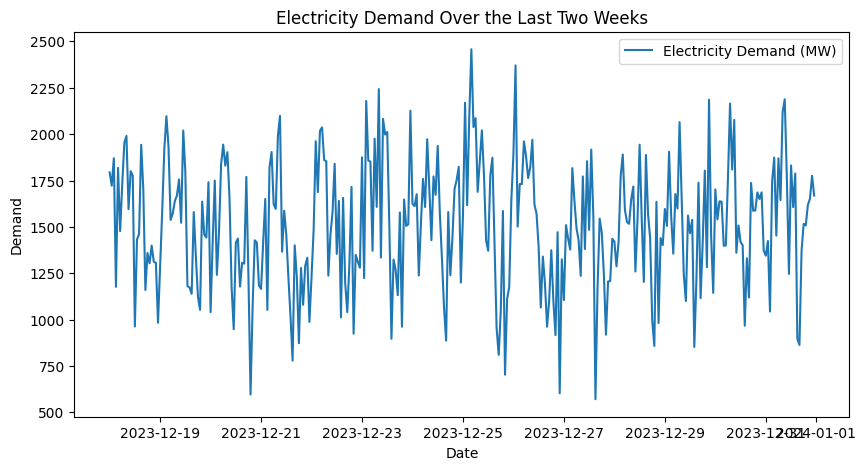

In [ ]:
last_two_weeks = data.last('14D')

plt.figure(figsize=(10, 5))
plt.plot(last_two_weeks.index, last_two_weeks['Electricity Demand (MW)'], label='Electricity Demand (MW)')
plt.title('Electricity Demand Over the Last Two Weeks')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# **Step 2: Decompose the Time Series**

Decomposing the time series into trend, seasonality, and residuals will help in understanding underlying patterns and will guide the choice of forecasting model.

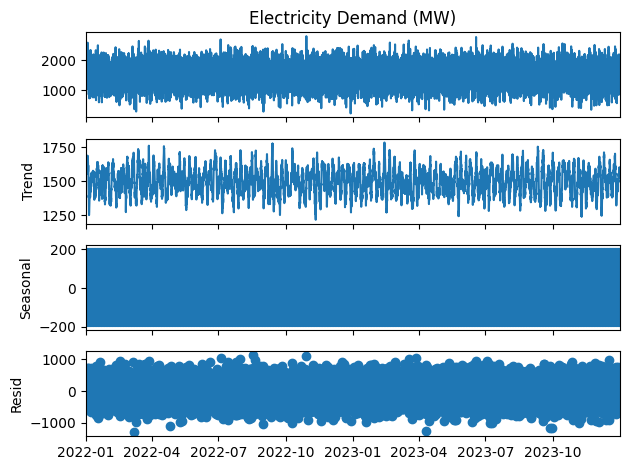

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Electricity Demand (MW)'], model='additive', period=24)  # assuming hourly data

# Plot the decomposed components
decomposition.plot()
plt.show()


# **Step 3: Build a Forecasting Model**

### **Option 1: ARIMA Model**

ARIMA models are commonly used in time series forecasting, especially when the data shows evidence of non-stationarities such as trends and seasonal effects.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
# Example: ARIMA(2, 1, 2) - These parameters should ideally be optimized
model = ARIMA(data['Electricity Demand (MW)'], order=(2, 1, 2))
model_fit = model.fit()

# Forecast the next 24 hours
forecast = model_fit.forecast(steps=24)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-01-01 00:00:00    1578.283056
2024-01-01 01:00:00    1559.371606
2024-01-01 02:00:00    1542.608984
2024-01-01 03:00:00    1531.116205
2024-01-01 04:00:00    1523.027717
2024-01-01 05:00:00    1517.351882
2024-01-01 06:00:00    1513.367738
2024-01-01 07:00:00    1510.571178
2024-01-01 08:00:00    1508.608201
2024-01-01 09:00:00    1507.230339
2024-01-01 10:00:00    1506.263182
2024-01-01 11:00:00    1505.584310
2024-01-01 12:00:00    1505.107793
2024-01-01 13:00:00    1504.773314
2024-01-01 14:00:00    1504.538535
2024-01-01 15:00:00    1504.373737
2024-01-01 16:00:00    1504.258061
2024-01-01 17:00:00    1504.176866
2024-01-01 18:00:00    1504.119873
2024-01-01 19:00:00    1504.079868
2024-01-01 20:00:00    1504.051787
2024-01-01 21:00:00    1504.032077
2024-01-01 22:00:00    1504.018241
2024-01-01 23:00:00    1504.008530
Freq: H, Name: predicted_mean, dtype: float64


# **Option 2: LSTM Network**

LSTMs are a type of recurrent neural network suitable for sequence prediction problems and can capture long-term dependencies in time series data.


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocess data for LSTM
# Assuming 'data' is loaded and indexed by datetime
# Note: This requires creating sequences of 24 hours data points for training

# Normalize data
data_scaled = (data - data.min()) / (data.max() - data.min())

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

# Split into training and test data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
438/438 [==============================] - 6s 10ms/step - loss: 0.0239 - val_loss: 0.0170
Epoch 2/10
438/438 [==============================] - 5s 12ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 3/10
438/438 [==============================] - 4s 9ms/step - loss: 0.0158 - val_loss: 0.0155
Epoch 4/10
438/438 [==============================] - 4s 10ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 5/10
438/438 [==============================] - 8s 19ms/step - loss: 0.0155 - val_loss: 0.0155
Epoch 6/10
438/438 [==============================] - 4s 10ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 7/10
438/438 [==============================] - 5s 12ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 8/10
438/438 [==============================] - 4s 9ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 9/10
438/438 [==============================] - 4s 9ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 10/10
438/438 [==============================] - 5s 12ms/step - loss: 0.0152 - val_loss:

# **Step 4: Evaluate the Model's Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume predictions and actual values are stored in `predictions` and `actuals`
rmse = mean_squared_error(actuals, predictions, squared=False)
mae = mean_absolute_error(actuals, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


# **Explanation and Discussion**

**Analysis of Time Series Data:**

**Visualization** helps identify patterns, outliers, and structural breaks.

**Decomposition** helps in understanding the components of the time series, guiding the modeling process.

**Choice of Model:**

**ARIMA:** Chosen for its effectiveness in capturing trends and seasonality in time series data. Ideal when data exhibits clear patterns and linearity.

**LSTM:** Selected for its ability to learn long-term dependencies and non-linear relationships, suitable for more complex or larger datasets.

### **Improving Model Accuracy:**

**More data:** Collecting more historical data can improve the model's training, especially for capturing seasonality and trends.

**Feature engineering:** Including lag variables, rolling window statistics, or external variables like weather or economic indicators can provide additional predictive power.

**Hyperparameter tuning:** Optimizing parameters for ARIMA (p, d, q) or the architecture of the LSTM (number of layers, units per layer, etc.) can significantly impact performance.

**Ensemble methods:** Combining forecasts from multiple models can reduce the impact of individual model assumptions and potentially improve accuracy.


# **Scenario and Tasks:**

Forecast next 24-hour electricity demand using historical hourly data.

## **Steps Taken:**

 **1.Data Loading and Visualization:** Helps in understanding recent demand
  trends and identifying any obvious patterns or anomalies.
**2.Decomposition:** Breaks the series into trend, seasonality, and residuals,
 aiding in the understanding of the data's components.
**3.Model Building with ARIMA or LSTM:** Choice depends on the data's nature (linear trends favor ARIMA, while non-linear, long-term dependencies favor LSTM).

## **Model Choice:**

**ARIMA for Linear Relationships:** Good baseline for time series forecasting when data shows trends and seasonality that seem linear.

**LSTM for Complex Patterns:** Better for capturing long-term dependencies that might not strictly be linear.

**Improving Model Accuracy:**

**More Data:** More historical data can reveal more robust patterns and improve forecast reliability.

**Feature Engineering:** Including lag features, rolling means, or external variables (like weather) can enhance model predictions.

**Advanced Techniques:** Using ensemble methods or more complex configurations and hyperparameter tuning can refine predictions further.


# **THANK YOU FOR GIVE THIS OPPORUNITY** **.**

# **THANKS**